## Mortalidade no RN - 1996/2016

> O objetivo deste estudo é avaliar as causas de mortalidade no estado do Rio Grande do Norte.


### 1. Dependencies

In [1]:
library("read.dbc")

In [2]:
library(stringr)

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
library(ggplot2)

In [5]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



### 2. Variables

In [6]:
getwd()

[1] "/Users/rsilva/Documents/Estudos/Mortalidade"

In [7]:
path <- "/Users/rsilva/Documents/Estudos/Mortalidade"

In [8]:
pattern <- "DORN"

### 3. Tests

In [ ]:
do96 <- read.dbc("DORN1996.dbc")

In [ ]:
do10 <- read.dbc("DORN2010.DBC")

In [ ]:
do15 <- read.dbc("DORN2015.dbc")

In [ ]:
str(do96)

In [ ]:
str(do10)

In [ ]:
str(do15)

> Primeira observação, é necessário selecionar durante o unifying data apenas as variaveis desejadas, pois como visto, a estrutura dos dados sofreu mudanças significativas ao longo dos anos:

`DO1996 -> 40 variaveis`

`DO2010 -> 60 variaveis`

`DO2015 -> 92 variaveis`

> Importante igualmente verificar os dados que podem responder futuras dúvidas quanto violência contra mulher

> Após analisar cada uma das variaveis, foram selecionadas as listadas abaixo das quais se acredita que é possível extrair um perfil da violência contra a mulher.

##### Variaveis

- DTOBITO
- IDADE
- SEXO
- RACACOR
- ESTCIV
- ESC
- CODMUNRES
- LOCOCOR
- CODMUNOCOR
- GRAVIDEZ
- CAUSABAS
- LINHAA
- LINHAB
- LINHAC
- LINHAD
- LINHAII
- CIRCOBITO
- ACIDTRAB

### 4. Functions

In [9]:
reduce = function(data){
    tmp <- lapply(data, function(x) subset(x, select = c("DTOBITO",
                                                            "IDADE",
                                                            "SEXO",
                                                            "RACACOR",
                                                            "ESTCIV",
                                                            "ESC",
                                                            "CODMUNRES",
                                                            "LOCOCOR",
                                                            "CODMUNOCOR",
                                                            "GRAVIDEZ",
                                                            "CAUSABAS",
                                                            "LINHAA",
                                                            "LINHAB",
                                                            "LINHAC",
                                                            "LINHAD",
                                                            "LINHAII",
                                                            "CIRCOBITO",
                                                            "ACIDTRAB")))

    return(tmp)
}

### 4. Unifying Data

In [10]:
filestrsave <- "mortalidade_96-16.csv"

# listando os arquivos
listoffiles <- list.files(path, pattern = pattern)

# abrindo os arquivos
setwd(path)
myfiles = lapply(listoffiles, read.dbc)

# filtrando os arquivos
result_tmp <- reduce(myfiles)

# unificando todos os arquivos em um só
result = do.call(rbind, result_tmp)

# salvando o arquivo reduzido
write.csv2(result, filestrsave, row.names=FALSE)

gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1130802,60.4,1770749,94.6,1229508,65.7
Vcells,18903512,144.3,31186712,238.0,31159254,237.8


In [11]:
nrow(result)

[1] 324349

#### 4.1 Reopen Data

In [13]:
result <- read.csv2("mortalidade_96-16.csv", sep=";", header=T)

### 5. Reducing Women Data

In [14]:
summary(result$SEXO)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.000   1.000   1.427   2.000   9.000      25 

> Iremos ignorar os dados inconsistentes, uma vez que representam apenas 0.15% do total dos dados disponíveis

In [15]:
everyone <- subset(result, SEXO %in% c(1,2))
everyone <- droplevels(everyone)

In [16]:
str(everyone)

'data.frame':	323905 obs. of  18 variables:
 $ DTOBITO   : int  5011996 17111996 25011996 6041996 24041996 10061996 15061996 30061996 11071996 7071996 ...
 $ IDADE     : int  438 434 463 420 476 406 458 459 438 427 ...
 $ SEXO      : int  1 1 1 1 1 1 1 2 1 1 ...
 $ RACACOR   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ ESTCIV    : int  2 NA 1 1 NA 1 2 1 2 1 ...
 $ ESC       : Factor w/ 9 levels "0","1","2","3",..: NA 7 NA NA NA NA NA NA 2 2 ...
 $ CODMUNRES : int  2402600 2407500 2408102 2411908 2408003 2408003 2408102 2408003 2408102 2401453 ...
 $ LOCOCOR   : int  4 4 1 1 1 1 5 1 1 1 ...
 $ CODMUNOCOR: int  2106201 2111300 2300309 2408003 2304400 2304400 2306009 2304400 2304400 2304400 ...
 $ GRAVIDEZ  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ CAUSABAS  : Factor w/ 3825 levels "A001","A009",..: 3067 3663 806 2898 1463 721 2802 476 187 3010 ...
 $ LINHAA    : Factor w/ 3976 levels "*","**J960","**P285",..: NA NA NA NA NA NA NA NA NA NA ...
 $ LINHAB    : Factor w/ 5330 levels "*519",

In [17]:
summary(everyone)

    DTOBITO             IDADE            SEXO          RACACOR     
 Min.   :    1996   Min.   :  0.0   Min.   :1.000   Min.   :1.00   
 1st Qu.: 8072004   1st Qu.:446.0   1st Qu.:1.000   1st Qu.:1.00   
 Median :16012014   Median :469.0   Median :1.000   Median :3.00   
 Mean   :15711060   Mean   :451.6   Mean   :1.428   Mean   :2.56   
 3rd Qu.:23092006   3rd Qu.:482.0   3rd Qu.:2.000   3rd Qu.:4.00   
 Max.   :31122016   Max.   :999.0   Max.   :2.000   Max.   :5.00   
                    NA's   :546                     NA's   :64993  
     ESTCIV           ESC          CODMUNRES          LOCOCOR     
 Min.   :1.00    1      :84903   Min.   : 240000   Min.   :1.000  
 1st Qu.:1.00    2      :49346   1st Qu.: 240800   1st Qu.:1.000  
 Median :2.00    9      :34294   Median : 241120   Median :1.000  
 Mean   :2.06    3      :29345   Mean   :1123931   Mean   :1.977  
 3rd Qu.:3.00    4      :14810   3rd Qu.:2407708   3rd Qu.:3.000  
 Max.   :9.00    (Other):19695   Max.   :2415008   Max

> Todos os demais parametros com entrada NA será considerado como Valor Ignorado ou Não Informado, dependente do que representa a variavel.
> Exemplo, não necessariamente se preenche todas as Linhas de Causa Morte. Da mesma forma não haverá entrada para Gravidez caso o sexo do morto seja masculino. Entretanto era essencial ter a identificação de Sexo para o presente estudo.

In [18]:
men <- subset(everyone, SEXO == 1)
men <- droplevels(men)

In [19]:
women <- subset(everyone, SEXO == 2)
women <- droplevels(women)

In [20]:
summary(men)

    DTOBITO             IDADE            SEXO      RACACOR          ESTCIV     
 Min.   :    1996   Min.   :  0.0   Min.   :1   Min.   :1.00    Min.   :1.000  
 1st Qu.: 8072005   1st Qu.:439.0   1st Qu.:1   1st Qu.:1.00    1st Qu.:1.000  
 Median :16012010   Median :464.0   Median :1   Median :4.00    Median :2.000  
 Mean   :15703378   Mean   :448.1   Mean   :1   Mean   :2.69    Mean   :1.975  
 3rd Qu.:23092005   3rd Qu.:480.0   3rd Qu.:1   3rd Qu.:4.00    3rd Qu.:2.000  
 Max.   :31122016   Max.   :999.0   Max.   :1   Max.   :5.00    Max.   :9.000  
                    NA's   :290                 NA's   :36584   NA's   :21662  
      ESC          CODMUNRES          LOCOCOR        CODMUNOCOR     
 1      :45498   Min.   : 240000   Min.   :1.000   Min.   : 110011  
 2      :28358   1st Qu.: 240800   1st Qu.:1.000   1st Qu.: 240800  
 9      :19300   Median : 241120   Median :1.000   Median : 240895  
 3      :17017   Mean   :1118434   Mean   :2.097   Mean   :1121011  
 4      : 8508 

In [21]:
nrow(men)

[1] 185308

In [22]:
summary(women)

    DTOBITO             IDADE            SEXO      RACACOR          ESTCIV     
 Min.   :    1996   Min.   :  0.0   Min.   :2   Min.   :1.000   Min.   :1.000  
 1st Qu.: 8072003   1st Qu.:455.0   1st Qu.:2   1st Qu.:1.000   1st Qu.:1.000  
 Median :16022001   Median :474.0   Median :2   Median :1.000   Median :2.000  
 Mean   :15721331   Mean   :456.1   Mean   :2   Mean   :2.373   Mean   :2.181  
 3rd Qu.:23092007   3rd Qu.:485.0   3rd Qu.:2   3rd Qu.:4.000   3rd Qu.:3.000  
 Max.   :31122016   Max.   :999.0   Max.   :2   Max.   :5.000   Max.   :9.000  
                    NA's   :256                 NA's   :28409   NA's   :16820  
      ESC          CODMUNRES          LOCOCOR        CODMUNOCOR     
 1      :39405   Min.   : 240000   Min.   :1.000   Min.   : 110030  
 2      :20988   1st Qu.: 240800   1st Qu.:1.000   1st Qu.: 240810  
 9      :14994   Median : 241120   Median :1.000   Median : 240890  
 3      :12328   Mean   :1131281   Mean   :1.817   Mean   :1132833  
 4      : 6302 

In [23]:
nrow(women)

[1] 138597

In [24]:
str(men)

'data.frame':	185308 obs. of  18 variables:
 $ DTOBITO   : int  5011996 17111996 25011996 6041996 24041996 10061996 15061996 11071996 7071996 14081996 ...
 $ IDADE     : int  438 434 463 420 476 406 458 438 427 428 ...
 $ SEXO      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ RACACOR   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ ESTCIV    : int  2 NA 1 1 NA 1 2 2 1 2 ...
 $ ESC       : Factor w/ 9 levels "0","1","2","3",..: NA 7 NA NA NA NA NA 2 2 NA ...
 $ CODMUNRES : int  2402600 2407500 2408102 2411908 2408003 2408003 2408102 2408102 2401453 2412500 ...
 $ LOCOCOR   : int  4 4 1 1 1 1 5 1 1 1 ...
 $ CODMUNOCOR: int  2106201 2111300 2300309 2408003 2304400 2304400 2306009 2304400 2304400 2310803 ...
 $ GRAVIDEZ  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ CAUSABAS  : Factor w/ 3134 levels "A001","A009",..: 2460 3002 659 2302 1193 595 2211 152 2406 2173 ...
 $ LINHAA    : Factor w/ 3114 levels "*","**J960","**P285",..: NA NA NA NA NA NA NA NA NA NA ...
 $ LINHAB    : Factor w/ 4114 levels "*A029

### 6. Data Evaluation

> Avaliando as 10 principais causas de morte no estado para **Homens** e para **Mulheres**

In [25]:
men$DTOBITO <- str_pad(men$DTOBITO, 8, pad = "0")

In [26]:
women$DTOBITO <- str_pad(women$DTOBITO, 8, pad = "0")

In [27]:
men$ANO <- str_sub(men$DTOBITO, 5, 8)

In [28]:
women$ANO <- str_sub(women$DTOBITO, 5, 8)

In [29]:
groupedmen <- as.data.frame(table(subset(men, select = c("CAUSABAS", "ANO"))))

In [30]:
groupedwomen <- as.data.frame(table(subset(women, select = c("CAUSABAS", "ANO"))))

In [31]:
str(groupedmen)

'data.frame':	65814 obs. of  3 variables:
 $ CAUSABAS: Factor w/ 3134 levels "A001","A009",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ANO     : Factor w/ 21 levels "1996","1997",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq    : int  1 0 0 0 1 0 0 0 0 1 ...


In [32]:
str(groupedwomen)

'data.frame':	59262 obs. of  3 variables:
 $ CAUSABAS: Factor w/ 2822 levels "A009","A039",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ANO     : Factor w/ 21 levels "1996","1997",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq    : int  0 0 0 0 0 0 1 0 0 0 ...


In [33]:
top10men <- groupedmen %>%
  group_by(ANO) %>%
  top_n(n = 10, wt = Freq)

In [34]:
top10men$ANO <- as.Date(top10men$ANO, "%Y") 

In [35]:
str(top10men)

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	214 obs. of  3 variables:
 $ CAUSABAS: Factor w/ 3134 levels "A001","A009",..: 17 18 739 1049 1174 1287 1291 2211 2212 3100 ...
 $ ANO     : Date, format: "1996-06-18" "1996-06-18" ...
 $ Freq    : int  92 97 127 328 176 94 120 606 1196 117 ...
 - attr(*, "vars")= chr "ANO"
 - attr(*, "drop")= logi TRUE
 - attr(*, "indices")=List of 21
  ..$ : int  0 1 2 3 4 5 6 7 8 9
  ..$ : int  10 11 12 13 14 15 16 17 18 19
  ..$ : int  20 21 22 23 24 25 26 27 28 29
  ..$ : int  30 31 32 33 34 35 36 37 38 39 ...
  ..$ : int  41 42 43 44 45 46 47 48 49 50
  ..$ : int  51 52 53 54 55 56 57 58 59 60 ...
  ..$ : int  63 64 65 66 67 68 69 70 71 72 ...
  ..$ : int  74 75 76 77 78 79 80 81 82 83
  ..$ : int  84 85 86 87 88 89 90 91 92 93
  ..$ : int  94 95 96 97 98 99 100 101 102 103
  ..$ : int  104 105 106 107 108 109 110 111 112 113
  ..$ : int  114 115 116 117 118 119 120 121 122 123
  ..$ : int  124 125 126 127 128 129 130 131 132 133
  ..$ : int

In [36]:
top10women <- groupedwomen %>%
  group_by(ANO) %>%
  top_n(n = 10, wt = Freq)

In [37]:
top10women$ANO <- as.Date(top10women$ANO, "%Y") 

In [38]:
head(top10women)

CAUSABAS,ANO,Freq
A09,1996-06-18,84
A419,1996-06-18,69
C509,1996-06-18,80
E149,1996-06-18,192
I219,1996-06-18,240
I619,1996-06-18,62


### 7. Ploting Data

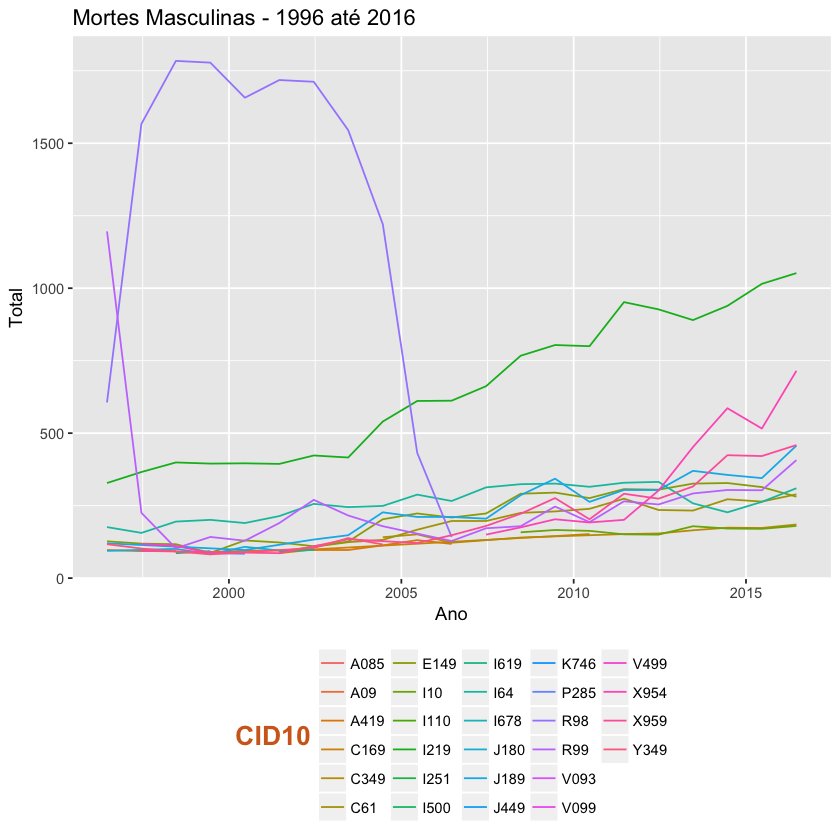

In [41]:
# plotmen <- ggplot(top10men,aes(ANO,Freq,fill=CAUSABAS))+
#     geom_point(na.rm=TRUE)
#    geom_bar(position="dodge",stat="identity")#+
#    facet_wrap(~ano,nrow=3)

plotmen <- ggplot(top10men,aes(x=ANO,y=Freq,group=CAUSABAS,color=CAUSABAS) ) + 
            geom_line() + scale_x_date() +
            scale_fill_continuous(guide = guide_legend()) +
            theme(legend.position="bottom") +
            labs(x="Ano", y="Total", title="Mortes Masculinas - 1996 até 2016") +
            theme(legend.title = element_text(colour="chocolate", size=16, face="bold")) +
            scale_color_discrete(name="CID10")

print(plotmen)

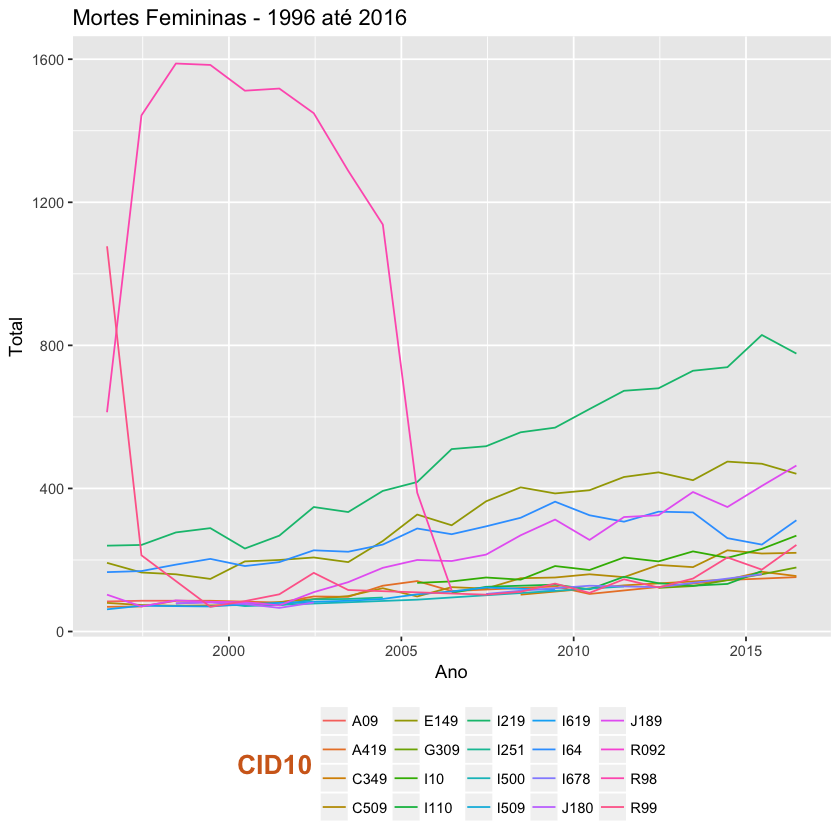

In [42]:
plotwomen <- ggplot(top10women,aes(x=ANO,y=Freq,group=CAUSABAS,color=CAUSABAS) ) + 
            geom_line() + scale_x_date() +
            scale_fill_continuous(guide = guide_legend()) +
            theme(legend.position="bottom") +
            labs(x="Ano", y="Total", title="Mortes Femininas - 1996 até 2016") +
            theme(legend.title = element_text(colour="chocolate", size=16, face="bold")) +
            scale_color_discrete(name="CID10")

print(plotwomen)